In [112]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 27 22:54:32 2021

@author: steve
"""

import numpy as np
import math
from minisom import MiniSom
import matplotlib.pyplot as plt

num1=[0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]
num2=[1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1]
num3=[1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1]
num4=[1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]
num5=[1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1]
num6=[1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1]
num7=[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]
num8=[1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1]
num9=[1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]
num0=[1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1]

data=[num1,num2,num3,num4,num5,num6,num7,num8,num9,num0]
data=np.asarray(data)

In [113]:
som_size=3
som = MiniSom(som_size, som_size, 36, sigma=1, learning_rate=0.1) # initialization of 6x6 SOM
som.train_random(data,1000) # trains the SOM with 100 iterations
weights=som.get_weights()

In [114]:
flatten_weights=[]
for i in range(0,len(weights)):
    for j in range(0,len(weights[i])):
        flatten_weights.append(weights[i,j,:])

In [115]:
#reshape
nr=9;
nc=4;
c1=np.zeros((nr,nc))
c=np.zeros((nr*som_size,nc*som_size,3))

#矩陣為將每一神經元權重串起
index=0
for t in range(0,som_size*som_size):
    i1=math.floor((t)/som_size);
    i2=t%som_size
    for i in range(1,nr):
        for j in range(1,nc):
            c1[i,j]=1-flatten_weights[t][(i-1)*nc+j]
            index=index+1


    c[i1*nr:i1*nr+nr,i2*nc:i2*nc+(nc),0]=c1;
    c[i1*nr:i1*nr+nr,i2*nc:i2*nc+(nc),1]=c1;
    c[i1*nr:i1*nr+nr,i2*nc:i2*nc+(nc),2]=c1;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


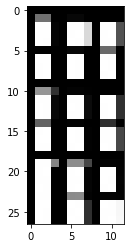

In [116]:
plt.figure()
plt.imshow(c)
plt.show()  # display it